$\newcommand{\xv}{\mathbf{x}}
 \newcommand{\wv}{\mathbf{w}}
 \newcommand{\yv}{\mathbf{y}}
 \newcommand{\zv}{\mathbf{z}}
 \newcommand{\Chi}{\mathcal{X}}
 \newcommand{\R}{\rm I\!R}
 \newcommand{\sign}{\text{sign}}
 \newcommand{\Tm}{\mathbf{T}}
 \newcommand{\Xm}{\mathbf{X}}
 \newcommand{\Xlm}{\mathbf{X1}}
 \newcommand{\Wm}{\mathbf{W}}
 \newcommand{\Vm}{\mathbf{V}}
 \newcommand{\Ym}{\mathbf{Y}}
 \newcommand{\Zm}{\mathbf{Z}}
 \newcommand{\Zlm}{\mathbf{Z1}}
 \newcommand{\I}{\mathbf{I}}
 \newcommand{\muv}{\boldsymbol\mu}
 \newcommand{\Sigmav}{\boldsymbol\Sigma}
 \newcommand{\Phiv}{\boldsymbol\Phi}
$

# Neural Networks

Neural networks, or artificial neural networks, are the computational models inspired by the brain. Mimicing the neurons' synaptic connecions (Figure 1), we build or stack multiple neuron-like hidden units to map data into nonlinear space for rich representation. 

<img src="https://upload.wikimedia.org/wikipedia/commons/1/10/Blausen_0657_MultipolarNeuron.png" width=500/>
<center>Figure 1. Anatomy of a neuron (wikipedia) </center>

Now, let us review the perceptron model. 

<img src="http://webpages.uncc.edu/mlee173/teach/itcs4156online/images/class/perceptron.png" width=600 />

In perceptron, passing the output of linear model to the step function, we get discrete outputs. 
Now, you can think a perceptron as a neuron. With a threshold zero, when the linear model outputs are over it, it passes the signal to next neuron. 

By connecting the perceptrons, we can actually build synaptic connections.
We call this model as *multi-layer perceptron* (MLP). 



**Q:** For inputs $x \in \{-1, +1 \}$, think about what the following picture represents and answer for it. 

1)
<img src="http://webpages.uncc.edu/mlee173/teach/itcs4156online/images/class/mlp_q1.png" width=300/>
    
2)
<img src="http://webpages.uncc.edu/mlee173/teach/itcs4156online/images/class/mlp_q2.png" width=300/>

3)
<img src="http://webpages.uncc.edu/mlee173/teach/itcs4156online/images/class/mlp_q3.png" width=700/>


Answer: 

1) +1

2) -1

3) -1

## Feed Forward Neural Networks

Fitting the data with MLP is a combinatorial optimization problem with non-smooth step function. 
So, we can consider smooth step function, a s-shaped sigmoid function. 
We call this smooth function as **activation function**.


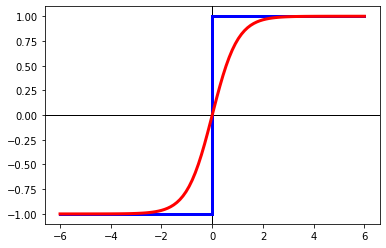

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

fig, ax = plt.subplots()

# x - y axis
ax.axhline(y=0, color='k', linewidth=1)
ax.axvline(x=0, color='k', linewidth=1)

# step function in blue 
plt.plot([0, 6], [1, 1], 'b-', linewidth=3)
plt.plot([-6, 0], [-1, -1], 'b-', linewidth=3)
plt.plot([0, 0], [-1, 1], 'b-', linewidth=3)

# tanh in red
x = np.linspace(-6, 6, 100)
plt.plot(x, np.tanh(x), 'r-', linewidth=3)


## Non-linear Extension of Linear Model

As we discussed, feed forward neural networks have a rich representation. Thus, it can represent the linear model with single layer. 

<img src="http://webpages.uncc.edu/mlee173/teach/itcs4156online/images/class/mlp_linear.png" width=400/>

Considering the multiple outputs, we formulated this in matrix: 

$$
\begin{align}
E &= \frac{1}{N} \frac{1}{K} \sum_{n=1}^{N} \sum_{k=1}^{K} (t_{nk} - y_{nk})^2 \\
\\
\Ym &= \Xlm \cdot \Wm
\end{align}
$$

Here, we assume the first column of $\Xlm$ is the bias column with 1's.  
Thus, the weight matrix $\Wm$ is $(D+1) \times K$ with the bias row in the first row.   

From this model, we can convert the raw data $\Xm$ to $\Phiv$, which is a nonlinear mapping.

$$
\phi: \Xm \rightarrow \Phiv
$$

Then, we can rewrite the linear model with as follows:

$$
\begin{align}
E &= \frac{1}{N} \frac{1}{K} \sum_{n=1}^{N} \sum_{k=1}^{K} (t_{nk} - y_{nk})^2 
\\
\Ym &= \Phiv \Wm \\ 
\\
\Ym_{nk} &= \Phiv_n^\top \Wm_k 
\end{align}
$$

Now, let $\phi(\xv) = h(\xv)$ where $h$ is the *activation function*.  

$$
\begin{align}
\Zm &= h(\Xlm \cdot \Vm) \\
\\
\Ym & = \Zlm \cdot \Wm 
\end{align}
$$

Figure below depics this model. 

<img src="http://webpages.uncc.edu/mlee173/teach/itcs4156online/images/class/nn.png" width=500/>

The size of each matrix is listed: 
- $\Xm: N \times D$
- $\Xlm: N \times (D+1)$
- $\Vm: (D+1) \times G$
- $\Zm: N \times G$
- $\Zlm: N \times (G+1)$
- $\Wm: (G+1) \times K$
- $\Ym: N \times K$

For this two-layer network, we call the blue circle layer with the activation functions as **hidden layer** and the organge layer with summation as **output layer**.

# Why Sigmoid? 

The resemblance to the step function can be good reason. But is there any other reason for choosing a sigmoid function as activation? 

Let us take a look at a polinomial function and the sigmoid.

$$
y = x^4 + 3 x^2 + 7 x + 3   \quad\quad\text{vs.}\quad\quad y = tanh(x)
$$

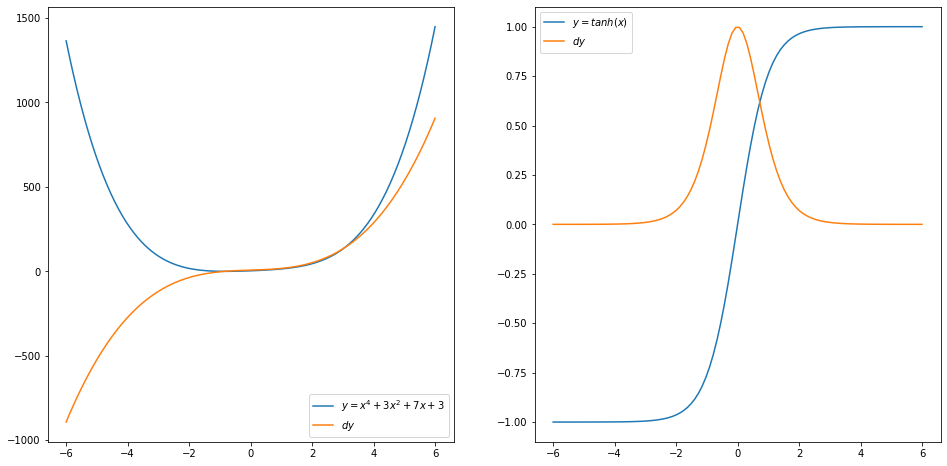

In [2]:
# polinomial function
def h_poly(x): 
    return x**4 + 3 * x**2 + 7 * x + 3

# sigmoid function
def h_sigmoid(x): 
    return np.tanh(x)

##### Gradient functions

# polinomial function
def dh_poly(x): 
    return 4 * x**3 + 6 * x + 7

# polinomial function
def dh_sigmoid(x): 
    h = h_sigmoid(x)
    return 1 - h ** 2

x = np.linspace(-6, 6, 100)

plt.figure(figsize=(16,8))
plt.subplot(121)
plt.plot(x, h_poly(x), label="$y = x^4 + 3 x^2 + 7 x + 3$")
plt.plot(x, dh_poly(x), label="$dy$")
plt.legend()

plt.subplot(122)
plt.plot(x, h_sigmoid(x), label="$y = tanh(x)$")
plt.plot(x, dh_sigmoid(x), label="$dy$")
plt.legend()


Here, we can see the polinomial gradients are very huge when $x$ is moving away from 0. A gradient descent procedure takes this huge step for the large positive or negative $x$ values, which can make learning divergent and unstable.

In the right figure, we can see the gradient is nearly turned off for large $x$ values. Only on the nonlinear region of sigmoid function, small gradient is applied for stable learning. 

# Gradient Descent

From the error function $E$, 

$$
E = \frac{1}{N} \frac{1}{K}\sum_{n=1}^{N} \sum_{k=1}^{K} (t_{nk} - y_{nk})^2,
$$

we can derive the gradient to update the weights for each layer. 

Since we can change the output and eventually the error by changing the weights $\Vm$ and $\Wm$, 

$$
\begin{align}
v_{dg} &\leftarrow v_{dg} - \alpha_h \frac{\partial{E}} {\partial{v_{dg}}} \\ 
\\ 
w_{gk} &\leftarrow w_{gk} - \alpha_o \frac{\partial{E}} {\partial{w_{gk}}},
\end{align}
$$

where $\alpha_h$ and $\alpha_o$ are the learning rate for hidden and output layer respectively. 

$$
\begin{align}
\frac{\partial{E}}{\partial{w_{gk}}} &= \frac{\partial{\Big( \frac{1}{N} \frac{1}{K} \sum_{n=1}^{N} \sum_{l=1}^{K} (t_{nl} - y_{nl})^2} \Big)}{\partial{w_{gk}}} \\
   &= -2  \frac{1}{N} \frac{1}{K} \sum_{n=1}^{N}(t_{nk} - y_{nk}) \frac{\partial{y_{nl}}}{\partial{w_{gk}}} 
\end{align}
$$

where 

$$
y_{nl} = z1_{n}^\top w_{*l} = \sum_{g=0}^{G} z1_{ng} w_{gl} . 
$$

The gradient for the output layer can be computed as follows:
$$
\begin{align}
\frac{\partial{E}}{\partial{w_{gk}}} &= -2 \frac{1}{N} \frac{1}{K} \sum_{n=1}^{N} (t_{nk} - y_{nk})  z1_{nk} \\
    &= -2 \frac{1}{N} \frac{1}{K} \Zlm^\top (\Tm - \Ym).
\end{align}  
$$

For the hidden layer, 

$$
\begin{align}
\frac{\partial{E}}{\partial{v_{dg}}} &= \frac{\partial{\Big( \frac{1}{N} \frac{1}{K} \sum_{n=1}^{N} \sum_{l=1}^{K} (t_{nl} - y_{nl})^2} \Big)}{\partial{v_{dg}}} \\
   &= -2  \frac{1}{N} \frac{1}{K} \sum_{n=1}^{N} \sum_{l=1}^{K} (t_{nl} - y_{nl}) \frac{\partial{y_{nl}}}{\partial{v_{dg}}} 
\end{align}
$$

where 

$$
y_{nl} = \sum_{g=0}^{G} z1_{ng} w_{gl} = \sum_{g=0}^G w_{gl} h (\sum_{d=0}^D v_{dg} x1_{nd}) . 
$$

Let $a_{ng} = \sum_{d=0}^D x1_{nd} v_{dg}$. Then, we can use a chain rule for the derivation. 

$$
\begin{align}
\frac{\partial{E}}{\partial{v_{dg}}} &= -2  \frac{1}{N} \frac{1}{K} \sum_{n=1}^{N} \sum_{l=1}^{K} (t_{nl} - y_{nl}) \frac{\partial{\Big(  \sum_{q=0}^G w_{ql} h (\sum_{p=0}^D v_{pq} x1_{np}) \Big)}}{\partial{v_{dg}}} \\
    &= -2  \frac{1}{N} \frac{1}{K} \sum_{n=1}^{N} \sum_{l=1}^{K} (t_{nl} - y_{nl}) \sum_{q=0}^G w_{ql} \frac{\partial{\Big( h (\sum_{p=0}^D v_{pq} x1_{np}) \Big)}}{\partial{v_{dg}}} \\
    &= -2  \frac{1}{N} \frac{1}{K} \sum_{n=1}^{N} \sum_{l=1}^{K} (t_{nl} - y_{nl}) \sum_{q=0}^G w_{ql} \frac{\partial{h(a_{ng})}}{\partial{a_{ng}}} \frac{\partial{a_{ng}}}{\partial{v_{dg}}} \\
    &= -2  \frac{1}{N} \frac{1}{K} \sum_{n=1}^{N} \sum_{l=1}^{K} (t_{nl} - y_{nl}) \sum_{q=0}^G w_{ql} \frac{\partial{h(a_{ng})}}{\partial{a_{ng}}} x1_{nd}.
\end{align}
$$

When $h = tanh$, 

$$
\frac{\partial{h(a_{ng})}}{\partial{a_{ng}}} = \frac{z_{ng}}{\partial{a_{ng}}} = (1 - z_{ng}^2). 
$$

Thus, 

$$
\frac{\partial{E}}{\partial{v_{dg}}} = -2  \frac{1}{N} \frac{1}{K} \sum_{n=1}^{N} \sum_{l=1}^{K} (t_{nk} - y_{nl}) \sum_{g=0}^G w_{gl} (1 - z_{ng}^2) x1_{nd}.
$$

Rewriting this in matrix form, 

$$
\frac{\partial{E}}{\partial{v_{dg}}} = -2 \frac{1}{N} \frac{1}{K} \Xlm^\top \Big( (\Tm - \Ym) \Wm^\top \odot (1 - \Zm^2) \Big).
$$

Here, $\odot$ denotes the element-wise multiplication.

To summarize, the backpropagation performs the this weight updates iteratively:  
$$
\begin{align}
\Vm &\leftarrow \Vm + \rho_h \frac{1}{N} \frac{1}{K} \Xlm^\top \Big( (\Tm - \Ym) \Wm^\top \odot (1 - \Zm^2) \Big), \\
\Wm &\leftarrow \Wm + \rho_o \frac{1}{N} \frac{1}{K} \Zlm^\top \Big( \Tm - \Ym \Big)
\end{align}
$$
where $\rho_h$ and $\rho_o$ are the learning rate for hidden and output layer weights. 

Implemented iteration follows. 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import IPython.display as ipd  # for display and clear_output
import time  # for sleep

In [4]:
# Make some training data
n = 20
X = np.linspace(0.,20.0,n).reshape((n,1)) - 10
T = 0.2 + 0.05 * (X+10) + 0.4 * np.sin(X+10) + 0.2 * np.random.normal(size=(n,1))

# Make some testing data
Xtest = X + 0.1*np.random.normal(size=(n,1))
Ttest = 0.2 + 0.05 * (Xtest+10) + 0.4 * np.sin(Xtest+10) + 0.2 * np.random.normal(size=(n,1))

nSamples = X.shape[0]
nOutputs = T.shape[1]

In [34]:
# Set parameters of neural network
nHiddens = 10

rhoh = 0.5
rhoo = 0.1

rh = rhoh / (nSamples*nOutputs)
ro = rhoo / (nSamples*nOutputs)

# Initialize weights to uniformly distributed values between small normally-distributed between -0.1 and 0.1
V = 0.1*2*(np.random.uniform(size=(1+1,nHiddens))-0.5)
W = 0.1*2*(np.random.uniform(size=(1+nHiddens,nOutputs))-0.5)

# Add constant column of 1's
def addOnes(A):
    return np.insert(A, 0, 1, axis=1)
X1 = addOnes(X)
Xtest1 = addOnes(Xtest)

# Take nReps steepest descent steps in gradient descent search in mean-squared-error function
nReps = 30000
# collect training and testing errors for plotting
errorTrace = np.zeros((nReps,2))

N_ = X1.shape[0]
K_ = W.shape[1]

fig = plt.figure(figsize=(10,8))
for reps in range(nReps):

    # Forward pass on training data
    Z = np.tanh(X1 @ V)
    Z1 = addOnes(Z)
    Y = Z1 @ W

    # Error in output
    error = T - Y
    
    print("V:", V.shape)
    print("X1:", X1.T.shape)
    print("error:", error.shape)
    print("W.T:", W.T.shape)
    print("Z:", Z.shape)
    print(np.square(Z).shape)

    # TODO: Backward pass - the backpropagation and weight update steps
    V = V + ((rh / (N_ * K_)) * X1.T * ((error * W.T) @ (1 - np.square(Z))))
    W = W + (ro / (N_ * K_)) * Z1.T * error

    # error traces for plotting
    errorTrace[reps,0] = np.sqrt(np.mean((error**2)))
    Ytest = addOnes(np.tanh(Xtest1 @ V)) @ W  #!! Forward pass in one line
    errorTrace[reps,1] = np.sqrt(np.mean((Ytest-Ttest)**2))

    if reps % 1000 == 0 or reps == nReps-1:
        plt.clf()
        plt.subplot(3,1,1)
        plt.plot(errorTrace[:reps,:])
        plt.ylim(0,0.7)
        plt.xlabel('Epochs')
        plt.ylabel('RMSE')
        plt.legend(('Train','Test'),loc='upper left')
        
        plt.subplot(3,1,2)
        plt.plot(X,T,'o-',Xtest,Ttest,'o-',Xtest,Ytest,'o-')
        plt.xlim(-10,10)
        plt.legend(('Training','Testing','Model'),loc='upper left')
        plt.xlabel('$x$')
        plt.ylabel('Actual and Predicted $f(x)$')
        
        plt.subplot(3,1,3)
        plt.plot(X,Z)
        plt.ylim(-1.1,1.1)
        plt.xlabel('$x$')
        plt.ylabel('Hidden Unit Outputs ($z$)');
        
        ipd.clear_output(wait=True)
        ipd.display(fig)
ipd.clear_output(wait=True)

V: (2, 10)
X1: (2, 20)
error: (20, 1)
W.T: (1, 11)
Z: (20, 10)
(20, 10)


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 20 is different from 11)

<Figure size 720x576 with 0 Axes>

$\newcommand{\xv}{\mathbf{x}}
 \newcommand{\wv}{\mathbf{w}}
 \newcommand{\yv}{\mathbf{y}}
 \newcommand{\zv}{\mathbf{z}}
 \newcommand{\av}{\mathbf{a}}
 \newcommand{\Chi}{\mathcal{X}}
 \newcommand{\R}{\rm I\!R}
 \newcommand{\sign}{\text{sign}}
 \newcommand{\Tm}{\mathbf{T}}
 \newcommand{\Xm}{\mathbf{X}}
 \newcommand{\Xlm}{\mathbf{X1}}
 \newcommand{\Wm}{\mathbf{W}}
 \newcommand{\Vm}{\mathbf{V}}
 \newcommand{\Ym}{\mathbf{Y}}
 \newcommand{\Zm}{\mathbf{Z}}
 \newcommand{\Zlm}{\mathbf{Z1}}
 \newcommand{\I}{\mathbf{I}}
 \newcommand{\muv}{\boldsymbol\mu}
 \newcommand{\Sigmav}{\boldsymbol\Sigma}
 \newcommand{\Phiv}{\boldsymbol\Phi}
$

# Optimization

So far, we have been using gradient descent to find minimum or maximum values in our error function. 
In general, we call this maximization or minimization problem as an **optimization problem**. 

In optimization problems, we look for the largest or the smallest value that a function can take. By systematically choosing input vales within the constraint set, optimization problem seeks for the best available values of an objective function.

So, for a given function $f(x)$ that maps $f: \Xm \rightarrow \Ym $ where $\Ym \subset \R$, 
we are looking for a $x^* \in \Xm$ that satisfies 

$$
\begin{cases}
    f(x^*) \le f(x) &\forall x       & \quad \text{if } \text{ minimization}\\
    f(x^*) \ge f(x) &\forall x  & \quad \text{if } \text{ maximization}.
  \end{cases}
$$
 
The optimization problems are often expressed in following notation.

$$
\begin{equation*}
\begin{aligned}
& \underset{x}{\text{minimize}}
& & f(x) \\
& \text{subject to}
& & x \le b_i, \; i = 1, \ldots, m,\\
 &&& x \ge 0.
\end{aligned}
\end{equation*}
$$

## Least Squares

$$
\begin{equation*}
\begin{aligned}
& \underset{\wv}{\text{minimize}}
& & \Vert \Xm \wv - t\Vert^2
\end{aligned}
\end{equation*}
$$

![](https://upload.wikimedia.org/wikipedia/commons/3/3a/Linear_regression.svg)


As we discussed, least-squares problems can be solved analytically, $\wv = (\Xm^\top \Xm)^{-1} \Xm^\top t$.
We easily formulate least-sqaures and solve very efficiently. 

## Linear Programming

$$
\begin{equation*}
\begin{aligned}
& \underset{\xv}{\text{minimize}}
& & \wv^\top \xv \\
& \text{subject to}
& & \av_i^\top \xv \le b_i, \; i = 1, \ldots, m.
\end{aligned}
\end{equation*}
$$

![](https://upload.wikimedia.org/wikipedia/commons/0/0c/Linear_Programming_Feasible_Region.svg)

Linear programming or linear optimization finds a maximum or minimum from a mathematical model that is represented by linear relationships. 
There is no analytical formular for a solution, but there are reliable algorithms that solve LP efficiently. 


## Convex Optimization

$$
\begin{equation*}
\begin{aligned}
& \underset{x}{\text{minimize}}
& & f_0(x) \\
& \text{subject to}
& & f_i(x) \leq b_i, \; i = 1, \ldots, m.
\end{aligned}
\end{equation*}
$$

![](http://www.convexoptimization.com/images/stories/max.jpg)

Convex condition: 
$$
f_i(\alpha x_1 + (1-\alpha) x_2) \le \alpha f_i(x_1) + (1-\alpha) f_i(x_2)
$$


Convex optimization generalizes the linear programming problems. A convex optimization problem has the constraint set that forms convex functions. As a general model of LP, convex optimization problems do not have analytical solution but they also have reliable and efficient algorithms for it. Thus, it can be solved very quickly and reliably up to very large problems.
However, it is difficulty to recognize if it is convex or not.


## Nonlinear Optimization

For non-convex problems, we can apply local optimization methods, which is called nonlinear programming. 
Starting from initial guess, it searchs for a minimal point near neighborhood. It can be fast and can be applicable large problems. However, there is no guarantee for discovery of global optimum. 

## Newton's method

Newton's method approximates the curve with quadratic function repeatedly to find a temporary point or stationary point of $f$. 

If we assume that for each measurement point $x^{(k)}$, we can compute $f(x^{(k)})$, $f^{\prime}(x^{(k)})$, and $f^{\prime\prime}(x^{(k)})$.
Using second order Taylor expansion, we can approximate $q(x)$ for $f(x + \Delta x)$:

$$
q(x) = f(x^{(k)}) + f^{\prime}(x^{(k)}) \Delta x + \frac{1}{2} f^{\prime\prime}(x^{(k)}) \Delta x^2
$$

where $\Delta x = (x - x^{(k)})$. 

Minimizing this quadratic function, 

$$
0 = q^\prime(x) = f^{\prime}(x^{(k)}) + f^{\prime\prime}(x^{(k)}) \Delta x. 
$$

Setting $x = x^{(k+1)}$, we can get

$$
 x^{(k+1)} =  x^{(k)} - \frac{f^{\prime}(x^{(k)})}{f^{\prime\prime}(x^{(k)})}.
$$

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.optimize as opt
from scipy.optimize import rosen, minimize


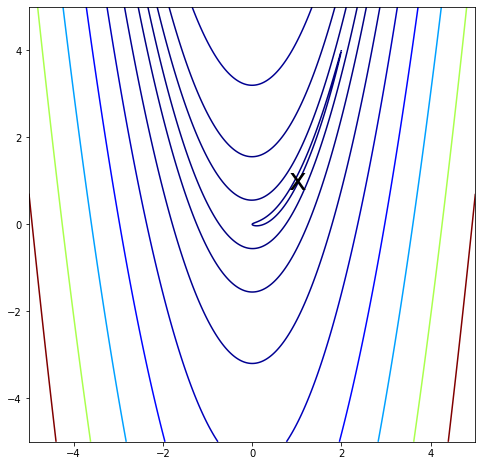

In [15]:
# examples are from http://people.duke.edu/~ccc14/sta-663-2017/14C_Optimization_In_Python.html

x = np.linspace(-5, 5, 1000)
y = np.linspace(-5, 5, 1000)

xs, ys = np.meshgrid(x, y)
zs = rosen(np.vstack([xs.ravel(), ys.ravel()])).reshape(xs.shape)

plt.figure(figsize=(8,8))
plt.contour(xs, ys, zs, np.arange(10)**5, cmap='jet')
plt.text(1, 1, 'x', va='center', ha='center', color='k', fontsize=30);

In [16]:
from scipy.optimize import rosen_der, rosen_hess

def reporter(p):
    """record the points visited"""
    global ps
    ps.append(p)

# starting position
x0 = np.array([4,-4.1])

ps = [x0]
minimize(rosen, x0, method="Newton-CG", jac=rosen_der, hess=rosen_hess, callback=reporter)


     fun: 1.3642782750354208e-13
     jac: array([ 1.21204353e-04, -6.08502470e-05])
 message: 'Optimization terminated successfully.'
    nfev: 38
    nhev: 26
     nit: 26
    njev: 38
  status: 0
 success: True
       x: array([0.99999963, 0.99999926])

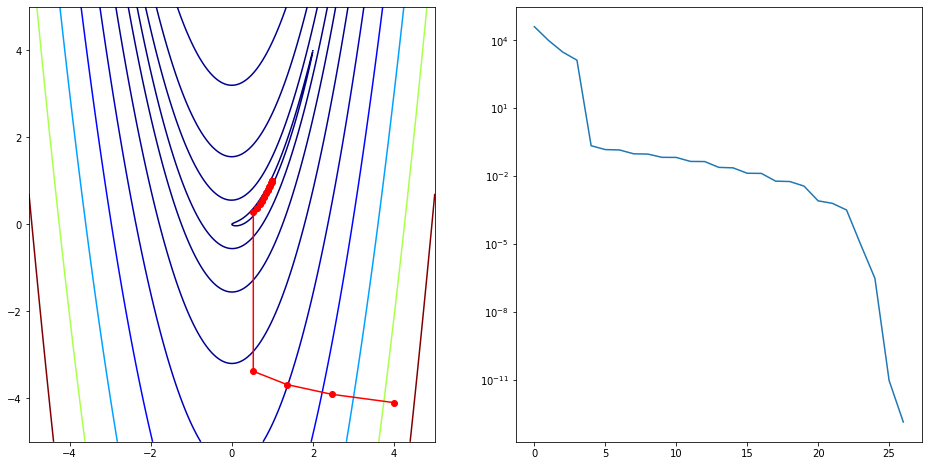

In [17]:
ps = np.array(ps)
plt.figure(figsize=(16, 8))
plt.subplot(121)
plt.contour(xs, ys, zs, np.arange(10)**5, cmap='jet')
plt.plot(ps[:, 0], ps[:, 1], '-ro')
plt.subplot(122)
plt.semilogy(range(len(ps)), rosen(ps.T));

## Vs. others?

Now, let us take a look at other optimization tools including naive steepest descent and scaled conjugate gradient ([Moller, 1997](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.50.8063&rep=rep1&type=pdf)). 
To run this properly, you need to download [grad.py](https://webpages.uncc.edu/mlee173/teach/itcs4156online/notes/grad.py) under your current work folder. 

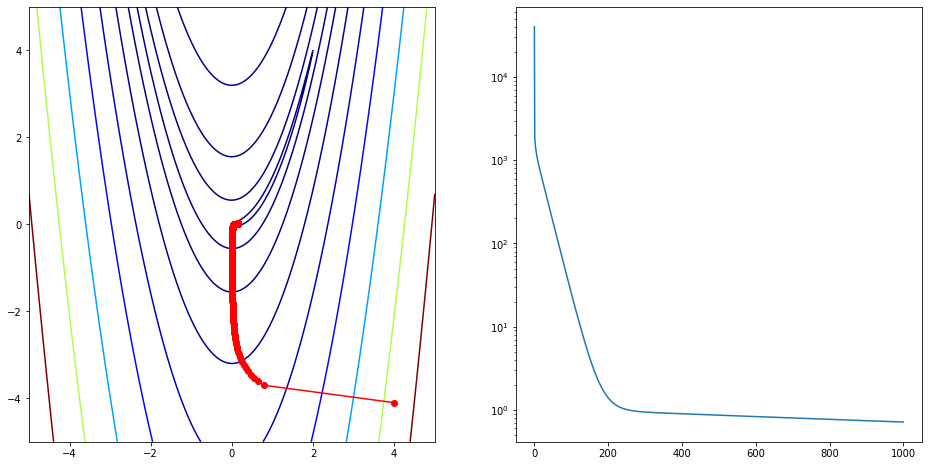

In [18]:
from grad import steepest

res = steepest(np.array(x0), rosen_der, rosen, stepsize=0.0001, wtracep=True, ftracep=True)

ps = np.array(res['wtrace'])
plt.figure(figsize=(16, 8))
plt.subplot(121)
plt.contour(xs, ys, zs, np.arange(10)**5, cmap='jet')
plt.plot(ps[:, 0], ps[:, 1], '-ro')
plt.subplot(122)
plt.semilogy(range(len(ps)), res['ftrace']);

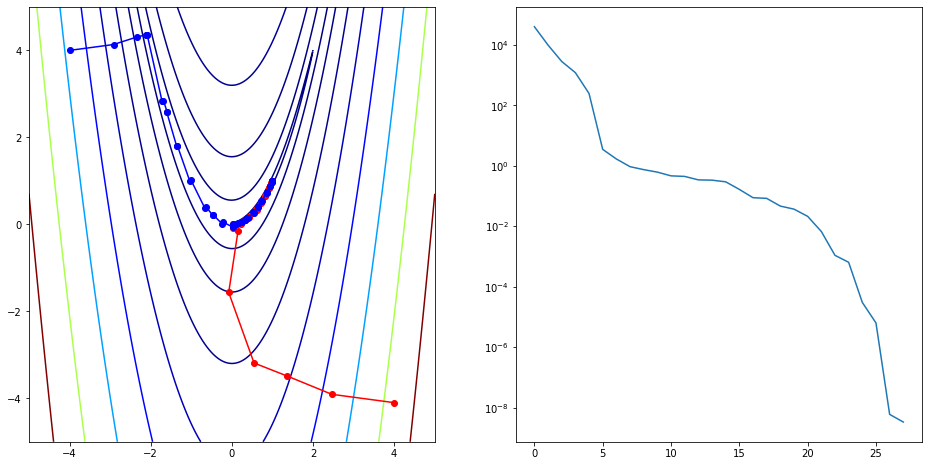

In [21]:
from grad import scg

res = scg(np.array(x0), rosen_der, rosen, wtracep=True, ftracep=True)
res1 = scg(np.array([-4, 4]), rosen_der, rosen, wtracep=True, ftracep=True)


ps = np.array(res['wtrace'])
ps1 = np.array(res1['wtrace'])
plt.figure(figsize=(16, 8))
plt.subplot(121)
plt.contour(xs, ys, zs, np.arange(10)**5, cmap='jet')
plt.plot(ps[:, 0], ps[:, 1], '-ro')
plt.plot(ps1[:, 0], ps1[:, 1], '-bo')
plt.subplot(122)
plt.semilogy(range(len(ps)), res['ftrace']);

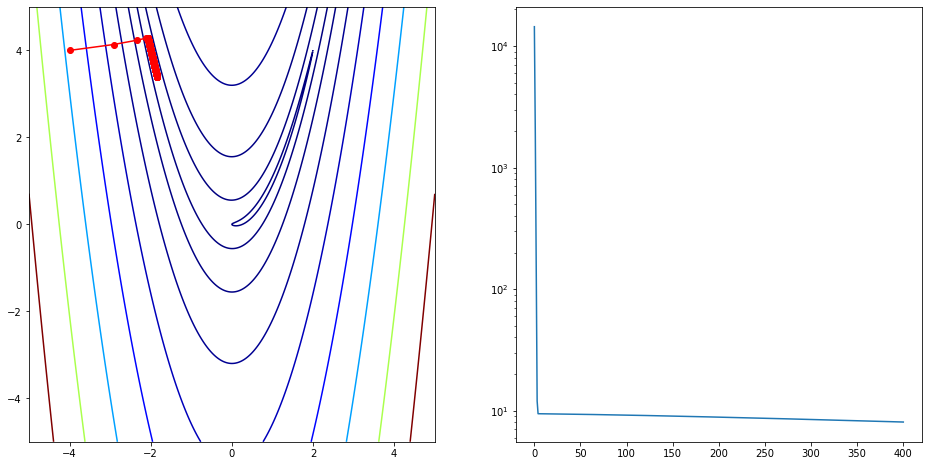

In [22]:
x0 = [-4, 4]
ps = [x0]
minimize(rosen, x0, method="Newton-CG", jac=rosen_der, hess=rosen_hess, callback=reporter)

ps = np.array(ps)
plt.figure(figsize=(16, 8))
plt.subplot(121)
plt.contour(xs, ys, zs, np.arange(10)**5, cmap='jet')
plt.plot(ps[:, 0], ps[:, 1], '-ro')
plt.subplot(122)
plt.semilogy(range(len(ps)), rosen(ps.T));

# Neural Network! 

Now, let us use this optimization trick for our neural networks. 


In [23]:
# standardization class
class Standardizer: 
    """ class version of standardization """
    def __init__(self, X, explore=False):
        self._mu = np.mean(X,0)  
        self._sigma = np.std(X,0)
        if explore:
            print ("mean: ", self._mu)
            print ("sigma: ", self._sigma)
            print ("min: ", np.min(X,0))
            print ("max: ", np.max(X,0))

    def set_sigma(self, s):
        self._sigma[:] = s

    def standardize(self,X):
        return (X - self._mu) / self._sigma 

    def unstandardize(self,X):
        return (X * self._sigma) + self._mu 
    

In [35]:

""" Neural Network 
        referenced NN code by Chuck Anderson in R and C++ 

                                by Jake Lee (lemin)

    example usage:
        X = numpy.array([0,0,1,0,0,1,1,1]).reshape(4,2)
        T = numpy.array([0,1,1,0,1,0,0,1]).reshape(4,2)

        nn = nnet.NeuralNet([2,3,2])
        nn.train(X,T, wprecision=1e-20, fprecision=1e-2)
        Y = nn.use(X)

"""
from grad import scg, steepest
from copy import copy


class NeuralNet:
    """ neural network class for regression
        
        Parameters
        ----------
        nunits: list
            the number of inputs, hidden units, and outputs

        Methods
        -------
        set_hunit    
            update/initiate weights

        pack 
            pack multiple weights of each layer into one vector

        forward
            forward processing of neural network

        backward
            back-propagation of neural network

        train
            train the neural network

        use
            appply the trained network for prediction

        Attributes
        ----------
        _nLayers
            the number of hidden unit layers 

        rho
            learning rate

        _W
            weights
        _weights
            weights in one dimension (_W is referencing _weight)

        stdX
            standardization class for data
        stdT
            standardization class for target

        Notes
        -----
        
    """

    
    # TODO: Try to implement Neural Network class with the member variables and methods described above
    
    
    
    
    
    
    

In [80]:
X = np.array([0,0,1,0,0,1,1,1]).reshape(4,2)
T = np.array([0,1,1,0,1,0,0,1]).reshape(4,2)

nn = NeuralNet([2,3,2])
nn.train(X, T) 
Y = nn.use(X)

In [81]:
Y

array([[  6.57854210e-07,   1.00000047e+00],
       [  1.00000100e+00,  -1.17983002e-07],
       [  1.00000194e+00,  -2.09443329e-07],
       [  2.12270757e-06,   1.00000155e+00]])

In [82]:
T

array([[0, 1],
       [1, 0],
       [1, 0],
       [0, 1]])

In [83]:
X

array([[0, 0],
       [1, 0],
       [0, 1],
       [1, 1]])

In [96]:
# repeating the previous example

# Make some training data
n = 20
X = np.linspace(0.,20.0,n).reshape((n,1)) - 10
T = 0.2 + 0.05 * (X+10) + 0.4 * np.sin(X+10) + 0.2 * np.random.normal(size=(n,1))

# Make some testing data
Xtest = X + 0.1*np.random.normal(size=(n,1))
Ttest = 0.2 + 0.05 * (Xtest+10) + 0.4 * np.sin(Xtest+10) + 0.2 * np.random.normal(size=(n,1))

nSamples = X.shape[0]
nOutputs = T.shape[1]

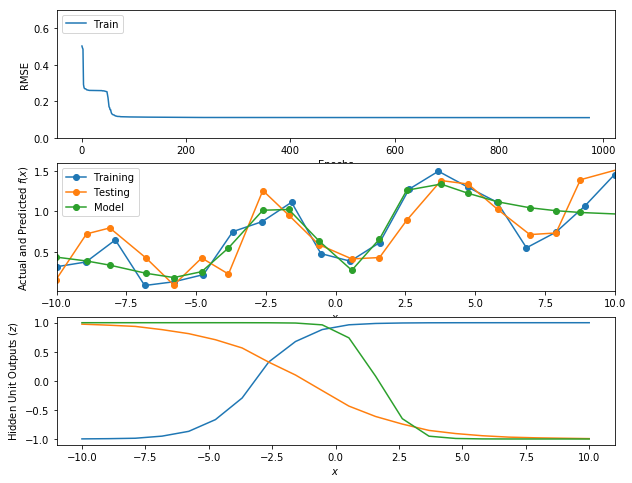

In [97]:
nn = NeuralNet([1,3,1])
nn.train(X, T, ftracep=True) 
Ytest, Z = nn.use(Xtest, retZ=True)

plt.figure(figsize=(10,8))
plt.subplot(3,1,1)
plt.plot(nn.ftrace)
plt.ylim(0,0.7)
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend(('Train','Test'),loc='upper left')

plt.subplot(3,1,2)
plt.plot(X,T,'o-',Xtest,Ttest,'o-',Xtest,Ytest,'o-')
plt.xlim(-10,10)
plt.legend(('Training','Testing','Model'),loc='upper left')
plt.xlabel('$x$')
plt.ylabel('Actual and Predicted $f(x)$')

plt.subplot(3,1,3)
plt.plot(X, Z[1])
plt.ylim(-1.1,1.1)
plt.xlabel('$x$')
plt.ylabel('Hidden Unit Outputs ($z$)');